**This notebook demonstartes machine learning models.**

**Models implemented currently are: Decision Tree Regressor, Random Forest, Naive Bayes, Linear Regression.**

**Models are exposed using an API.**

**Dataset used is of "Melbourne Housing Data" more about which can be found here: https://www.kaggle.com/dansbecker/starting-your-ml-project/data**

We import various modules to obtain the functionalities needed in the project and offered by various packages.

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from flask import Flask, json, jsonify
from matplotlib import pyplot as plt
from math import sqrt

Dataset resides in the path indicated by the variable melbourne_file_path below.

In [263]:
melbourne_file_path = "melbourne-housing-staticversion/melb_data.csv"
m_data = pd.read_csv(melbourne_file_path)

Setting precision

In [286]:
pd.options.display.float_format = '{:.7f}'.format

Displaying initial 5 rows of the dataset

In [245]:
m_data.head()

,Serial,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Renaming unnamed column

In [364]:
m_data.rename(columns = {m_data.columns.values[0]: 'Serial'}, inplace = True)

Inspecting the data

In [265]:
m_data.shape
m_data.describe()

,Serial,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.0000000,18396.0000000,1.8396000e+04,18395.0000000,18395.0000000,14927.0000000,14925.0000000,14820.0000000,13603.0000000,7762.0000000,8958.0000000,15064.0000000,15064.0000000,18395.0000000
mean,11826.7870733,2.9350402,1.0566975e+06,10.3899864,3107.1401468,2.9130435,1.5384925,1.6155196,558.1163714,151.2202195,1965.8799955,-37.8098491,144.9963378,7517.9752650
std,6800.7104480,0.9582015,6.4192167e+05,6.0090497,95.0009948,0.9646412,0.6893111,0.9559157,3987.3265856,519.1885958,37.0132607,0.0811524,0.1063752,4488.4165986
min,1.0000000,1.0000000,8.5000000e+04,0.0000000,3000.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1196.0000000,-38.1825500,144.4318100,249.0000000
25%,5936.7500000,2.0000000,6.3300000e+05,6.3000000,3046.0000000,2.0000000,1.0000000,1.0000000,176.5000000,93.0000000,1950.0000000,-37.8581000,144.9311925,4294.0000000
50%,11820.5000000,3.0000000,8.8000000e+05,9.7000000,3085.0000000,3.0000000,1.0000000,2.0000000,440.0000000,126.0000000,1970.0000000,-37.8036250,145.0009200,6567.0000000
75%,17734.2500000,3.0000000,1.3020000e+06,13.3000000,3149.0000000,3.0000000,2.0000000,2.0000000,651.0000000,174.0000000,2000.0000000,-37.7562700,145.0600000,10331.0000000
max,23546.0000000,12.0000000,9.0000000e+06,48.1000000,3978.0000000,20.0000000,8.0000000,10.0000000,433014.0000000,44515.0000000,2018.0000000,-37.4085300,145.5263500,21650.0000000


We find that BuildingArea and YearBuilt have 58% and 52% NULL data. So, it's safe not to consider them for further analysis. We go on to transform data and impute the features, and feed the new transformed data under 'melbourne_data'.

In [287]:
melbourne_data.drop(['BuildingArea', 'YearBuilt'], axis = 1, inplace = True)

Now, we analyse features for the range of values they are most effective at. The target is price.

We start with sellers according to the number of properties they have.

In [325]:
no_of_sellers = len(m_data['SellerG'].unique())
pd.options.display.max_rows = no_of_sellers
gp_sellers = m_data.groupby('SellerG').agg({'Serial': 'count', 'Price':'mean'}).reset_index().sort_values('Serial', ascending=False).head(70)
gp_sellers

,SellerG,Serial,Price
178,Nelson,2002,995317.0769231
124,Jellis,1759,1354763.2734508
294,hockingstuart,1580,940027.6892405
21,Barry,1390,858260.6215827
224,Ray,1032,853259.2655039
42,Buxton,939,1215085.2342918
157,Marshall,887,1911994.5186020
29,Biggin,496,994709.4758065
37,Brad,442,818067.1945701
289,Woodards,411,1034158.6885645


We see that mean price for sellers having properties around 250, then, again rapidly starts increasing from 500 to decrease before 1000. Later on, it remains steady or increases after 1000 only to decrease before 2000.

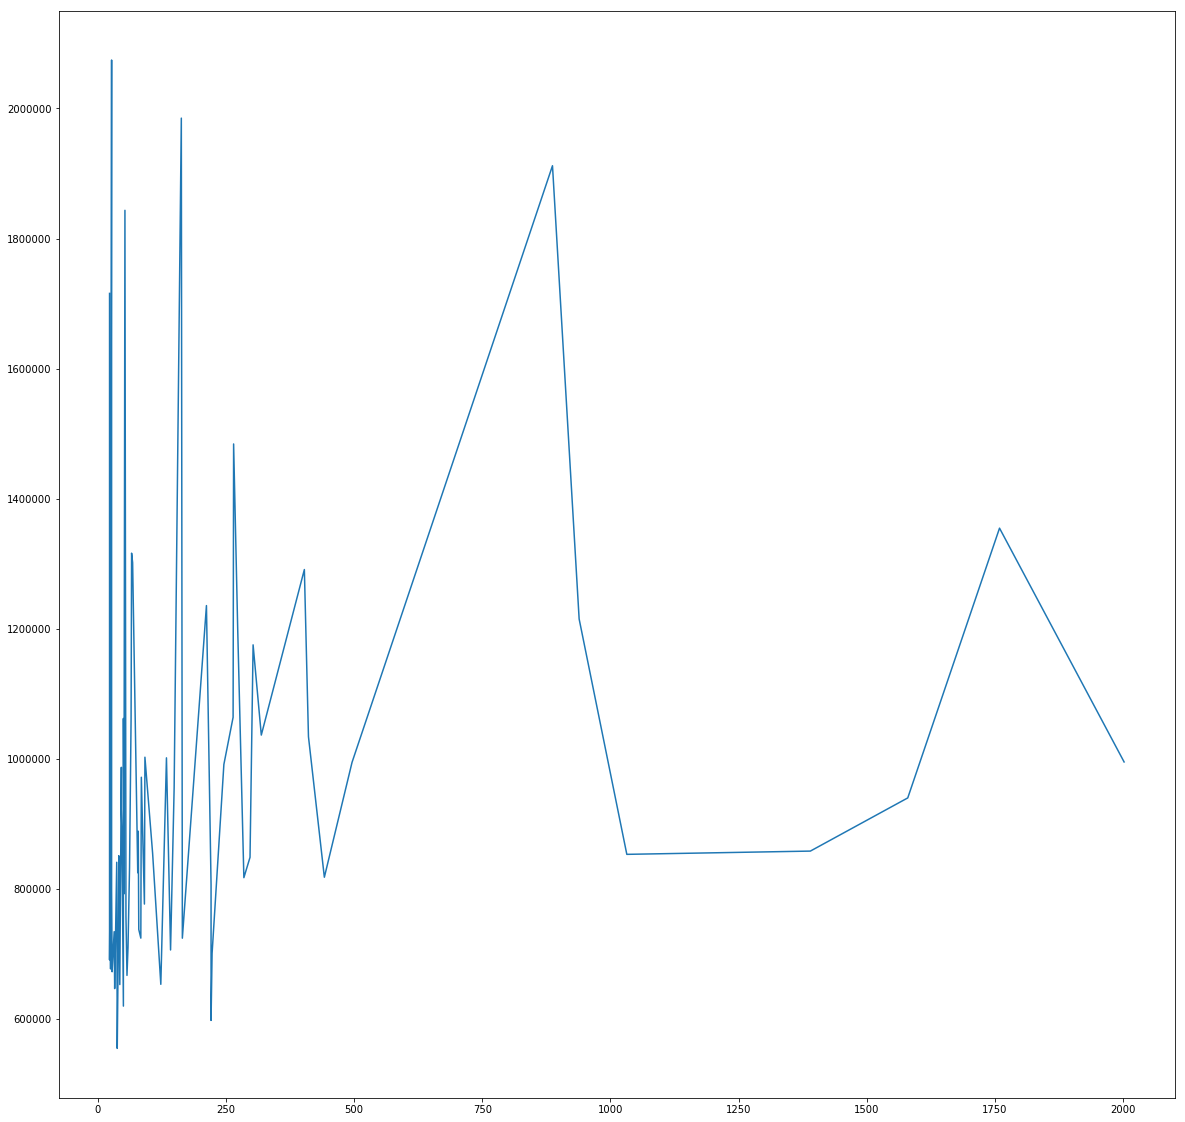

In [324]:
plt.figure(figsize=(20,20))
plt.plot(gp_sellers['Serial'], gp_sellers['Price'])
#plt.xticks(np.arange(min(gp_sellers['Serial']), max(gp_sellers['Serial'])+1, 1.0))
#plt.yticks(np.arange(min(gp_sellers['Price']), max(gp_sellers['Price'])+1, 1.0))
plt.show()

Next, we analyze the relation between no of rooms in the house and the price of the house.

Grouping price according to the no of rooms

In [365]:
gp_rooms = m_data.groupby('Rooms').agg({'Serial': 'count', 'Price':'mean'}).reset_index().sort_values('Price', ascending = False).head(70)
gp_rooms.sort_values('Price', ascending = 'False')

,Rooms,Serial,Price
0,1,909,435755.4466447
1,2,4992,755657.0651042
2,3,7953,1052702.6821325
8,9,1,1380000.0000000
3,4,3648,1433786.7549342
6,7,13,1759384.6153846
4,5,773,1863780.9935317
5,6,92,1863853.2608696
7,8,10,1916200.0000000
9,10,4,1943750.0000000


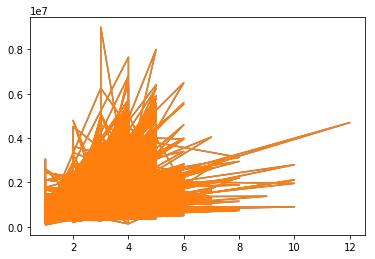

In [360]:
plt.plot(m_data['Rooms'], m_data['Price'])
plt.show()

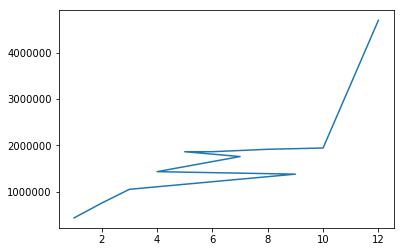

In [358]:
plt.plot(gp_rooms['Rooms'], gp_rooms['Price'])
plt.show()

We observe that the no. of houses having the give no. of rooms also matter. Even when, the price is highest for the house having 12 rooms, there is only 1 house with such no of rooms. The order is: 3, 2, 4, 1, 5, 6, and effective range is [3, 7].

In [178]:
melbourne_data = m_data

Below, we transform the data because there are various columns with different data types.

In [93]:
number = preprocessing.LabelEncoder()
melbourne_data=melbourne_data.astype(str)
melbourne_data=melbourne_data.apply(number.fit_transform)
melbourne_data=melbourne_data.fillna(-999)

Preprocessing data. There are null values that need to be filled up. Imputer() here uses mean as the measure of central tendency.

In [94]:
my_imputer = Imputer(strategy='mean', axis=0)
data_with_imputed_values = pd.DataFrame(my_imputer.fit_transform(melbourne_data))
data_with_imputed_values.columns = melbourne_data.columns

In [61]:
# features

features = ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']
 
# Use following to test a subset of features or a single feature.
# specific_feature = ['Rooms']

# target
target = 'Price'

In [9]:
# variable x represents the data of selected features
x = melbourne_data[features]

# Uncomment below, and use a specific_feature
# x = melbourne_data[specific_feature]

# variable y represents the data of the target
y = melbourne_data[target]

train_test_split() splits the dataset into training and test data with the share of 67% and 33% respectively. x_train, y_train,
x_test, and y_test represent training feature, training target, testing feature, and testing target respectively.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324)

***We invoke DecisionTreeRegressor() available from scikit-learn to implement Decision Tree Regression algorithm
as the data is not categorical here, and subsequently, feed the training data to it.***

In [11]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

Now, it's time to predict the testing target mapping to testing feature(s).

In [12]:
y_predict = dt_model.predict(x_test)

In [13]:
# To validate our model, we use root mean square error which indicates the standard deviation.
RMSE = sqrt(mean_squared_error(y_test, y_predict))
print(RMSE)

# With regression model, we can find mean absolute error.
mae = mean_absolute_error(y_test, y_predict)
print(mae)

# If we use DecisionTreeClassifier(), accuracy score tells us the accuracy of our model using the confusion matrix parameters.
#accuracy_score(y_true = y_test, y_pred = y_predict)

0.5665989992573932
0.200461209027


We plot the graph for x_test and y_test, the actual data.

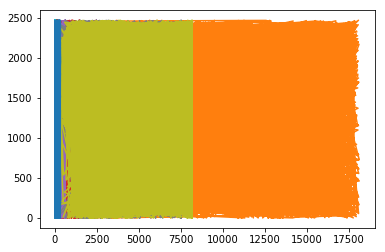

In [14]:
plt.plot(x_test, y_test)
plt.show()

We plot the graph for x_test and y_predict, the predicted data.

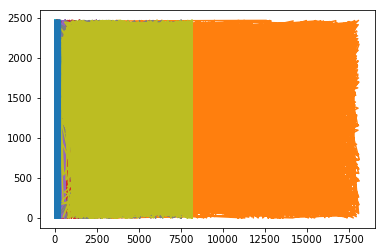

In [15]:
plt.plot(x_test, y_predict)
plt.show()

In [16]:
# Here we serialize our model using joblib from flask.
joblib.dump(dt_model, "decision_tree_model.pkl")

['decision_tree_model.pkl']

In [366]:
# Now, we deserialize the model and use it for prediction.
dt_model = joblib.load("./decision_tree_model.pkl")

# Below, we predict for a specific feature.
# json.dumps(dt_model.predict(10).tolist())

***Now, we demonstrate Random Forest model. In random forest model, we implement the concept of bagging where multiple decision trees are implemented and best out of them is used for prediction. This helps us in reducing the error and bettering our prediction and accuracy (with classifier) both. And hopefully, precision too!***

We invoke RandomForestRegressor() available from scikit-learn to implement Random Forest Regressor algorithm, and
subsequently, feed the training data to it.

In [18]:
forest_model = RandomForestRegressor()
forest_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [19]:
# Now, it's time to predict the testing target mapping to testing feature(s).
y_predict = forest_model.predict(x_test)
y_predict

array([ 2336.1,  1963.2,  1588. , ...,  2263.3,  2089. ,   537. ])

In [20]:
# To validate our model, we use root mean square error which indicates the standard deviation.
RMSE = sqrt(mean_squared_error(y_test, y_predict))
print(RMSE)

# With regression model, we can find mean absolute error.
mae = mean_absolute_error(y_test, y_predict)
print(mae)

0.40991058078138654
0.190298138692


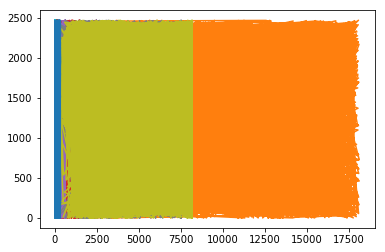

In [21]:
# We plot the graph for x_test and y_test, the actual data.
plt.plot(x_test, y_test)
plt.show()

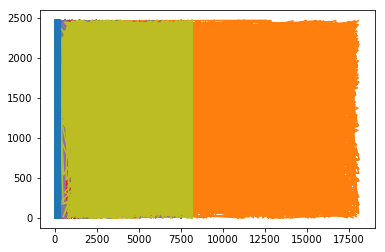

In [22]:
# We plot the graph for x_test and y_predict, the predicted data.
plt.plot(x_test, y_predict)
plt.show()

***Now, we demonstrate Linear Regression model to predict the prices.***

We invoke LinearRegression() available from scikit-learn to implement Linear Regression algorithm, and 
subsequently, feed the training data to it.

In [23]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# Now, it's time to predict the testing target mapping to testing feature(s).
y_predict = lr_model.predict(x_test)
y_predict

array([ 2336.,  1962.,  1588., ...,  2263.,  2089.,   537.])

In [25]:
# To validate our model, we use root mean square error which indicates the standard deviation.
RMSE = sqrt(mean_squared_error(y_test, y_predict))
print(RMSE)

# With regression model, we can find mean absolute error.
mae = mean_absolute_error(y_test, y_predict)
print(mae)

1.6231412237329057e-12
1.31913023133e-12


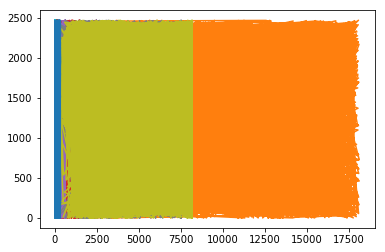

In [26]:
# We plot the graph for x_test and y_test, the actual data.
plt.plot(x_test, y_test)
plt.show()

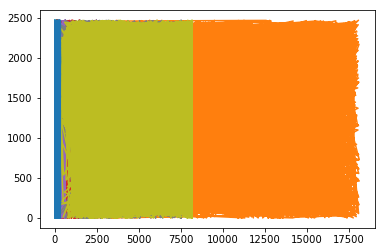

In [27]:
# We plot the graph for x_test and y_predict, the predicted data.
plt.plot(x_test, y_predict)
plt.show()

We invoke GaussianNB() to implement Gaussian event model for Naive Bayes — available from scikit-learn
to implement Linear Regression algorithm, and subsequently, feed the training data to it.

In [28]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB(priors=None)

In [29]:
# Now, it's time to predict the testing target mapping to testing feature(s).
y_predict = nb_model.predict(x_test)
y_predict

array([2335, 1963, 1588, ..., 2265, 2089,  537], dtype=int64)

In [30]:
# To validate our model, we use root mean square error which indicates the standard deviation.
RMSE = sqrt(mean_squared_error(y_test, y_predict))
print(RMSE)

# With regression model, we can find mean absolute error.
mae = mean_absolute_error(y_test, y_predict)
print(mae)

0.9177148935952473
0.38329764454


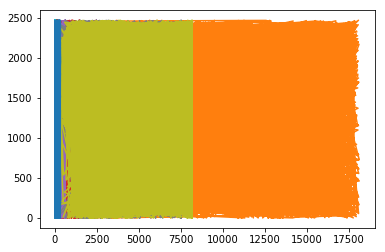

In [31]:
# We plot the graph for x_test and y_test, the actual data.
plt.plot(x_test, y_test)
plt.show()

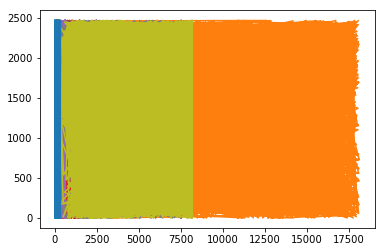

In [32]:
# We plot the graph for x_test and y_predict, the predicted data.
plt.plot(x_test, y_predict)
plt.show()